In [3]:
!python -m pip install seaborn

  Using cached https://files.pythonhosted.org/packages/a8/76/220ba4420459d9c4c9c9587c6ce607bf56c25b3d3d2de62056efe482dadc/seaborn-0.9.0-py3-none-any.whl


In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

df_titanic = pd.read_csv('train.csv')
df_titanic.head(3)

print('\n ### Train Data info ### \n')
print(df_titanic.info())


 ### Train Data info ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


In [84]:
print('Null count of each column')
print(df_titanic.isnull().sum()) # 카테고리별 null값이 몇개 들어있는지 확인한다.
print('Null count of data set :', df_titanic.isnull().sum().sum()) #null값의 총 합계를 count해준다.

df_titanic['Age'].fillna(df_titanic['Age'].mean(), inplace=True)
df_titanic['Cabin'].fillna('N', inplace=True)
df_titanic['Embarked'].fillna('N', inplace=True)

print('\nNull count of each column')
print(df_titanic.isnull().sum())
print('Null count of data set:', df_titanic.isnull().sum().sum())



Null count of each column
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Null count of data set : 866

Null count of each column
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64
Null count of data set: 0


In [45]:
print('Distribution of Sex :')
print(df_titanic['Sex'].value_counts())

print('\nDistiribution of Cabin :')
print(df_titanic['Cabin'].value_counts())

print('\nDistribution of Embarked :')
print(df_titanic['Embarked'].value_counts())


Distribution of Sex :
male      577
female    314
Name: Sex, dtype: int64

Distiribution of Cabin :
N              687
B96 B98          4
C23 C25 C27      4
G6               4
E101             3
C22 C26          3
F2               3
D                3
F33              3
B51 B53 B55      2
B77              2
D35              2
B18              2
C83              2
F G73            2
C125             2
C126             2
B22              2
D20              2
B28              2
D26              2
C92              2
C93              2
C52              2
D36              2
F4               2
E44              2
D17              2
C123             2
C2               2
              ... 
F E69            1
E17              1
D9               1
C87              1
E38              1
E46              1
E63              1
D11              1
C110             1
B37              1
C82              1
D47              1
A14              1
C54              1
D45              1
C50              1
A36    

In [46]:
df_titanic['Cabin'] = df_titanic['Cabin'].str[:1] #방 등급의 첫 번째 문자값으로 변환
print(df_titanic['Cabin'].head(3)) # 0,1,2 번째 까지만


0    N
1    C
2    N
Name: Cabin, dtype: object


Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


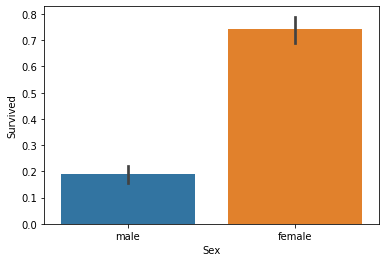

In [47]:
print(df_titanic.groupby(['Sex', 'Survived'])['Survived'].count())
print(sns.barplot(x='Sex', y='Survived', data=df_titanic))

Sex     Survived  Pclass
female  0         1           3
                  2           6
                  3          72
        1         1          91
                  2          70
                  3          72
male    0         1          77
                  2          91
                  3         300
        1         1          45
                  2          17
                  3          47
Name: Survived, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


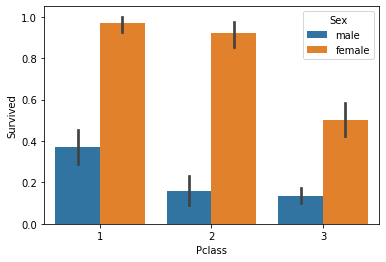

In [48]:
print(df_titanic.groupby(['Sex', 'Survived','Pclass'])['Survived'].count())
print(sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df_titanic)) #hue='Sex'를 통해 2차원으로 바꿀 수 있다.


In [49]:
#입력 age에 따라 구분값을 반환하는 함수 설정. DataFrame의 apply lambda식에 사용. 
def get_category(age):
    cat = ''
    if age <= -1:
        cat = 'Unknown'
    
    elif age <= 5:
        cat = 'Baby'
            
    elif age <= 12:
        cat = 'Child'
            
    elif age <= 18:
        cat = 'Teenager'
            
    elif age <= 25:
        cat = 'Student'
            
    elif age <= 35:
        cat = 'Young adult'
            
    elif age <= 60:
        cat = 'Adult'  
        
    else:
        cat = 'Elderly'
            
    return cat
    
df_titanic['Age_cat'] = df_titanic['Age'].apply(lambda x : get_category(x))
print(df_titanic['Age_cat'])
print(df_titanic)

0          Student
1            Adult
2      Young adult
3      Young adult
4      Young adult
5      Young adult
6            Adult
7             Baby
8      Young adult
9         Teenager
10            Baby
11           Adult
12         Student
13           Adult
14        Teenager
15           Adult
16            Baby
17     Young adult
18     Young adult
19     Young adult
20     Young adult
21     Young adult
22        Teenager
23     Young adult
24           Child
25           Adult
26     Young adult
27         Student
28     Young adult
29     Young adult
          ...     
861        Student
862          Adult
863    Young adult
864        Student
865          Adult
866    Young adult
867    Young adult
868    Young adult
869           Baby
870    Young adult
871          Adult
872    Young adult
873          Adult
874    Young adult
875       Teenager
876        Student
877        Student
878    Young adult
879          Adult
880        Student
881    Young adult
882        S

In [69]:
# lambda 식에 위에서 생성한 get_category( ) 함수를 반환값으로 지정. 
# get_category(X)는 입력값으로 'Age' 컬럼값을 받아서 해당하는 cat 반환
df_titanic['Age_cat'] = df_titanic['Age'].apply(lambda x : get_category(x))

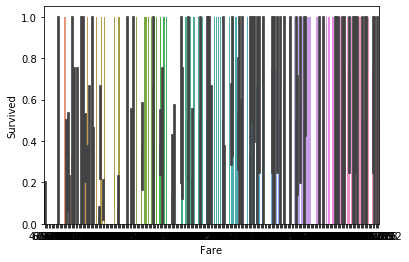

In [85]:
#sex, age와 survie의 상관관계
sns.barplot(x='Fare',y='Survived',data=df_titanic)

In [51]:
df_titanic.drop('Age_cat',axis=1,inplace=True)

In [77]:
#Null Data 처리 함수
def fillna(df):
    df['Age'].fillna(df_titanic['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

In [78]:
#머신러닝 알고리즘에 불필요한 feature 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

In [79]:
#Label Encoding
def encode_features(df):
    df['Cabin']=df['Cabin'].str[:1]
    features=['Cabin','Sex','Embarked']
    for feature in features:
        encoder=LabelEncoder()
        encoder.fit(df[feature])
        df[feature]=encoder.transform(df[feature])
    return df

In [80]:
#whole preprocessing method
def transform_features(df):
    df=fillna(df)
    df=drop_features(df)
    df=encode_features(df)
    return df

In [81]:
import pandas as pd
df_titanic=pd.read_csv('train.csv')

df_y_titanic=df_titanic['Survived']
df_x_titanic=df_titanic.drop('Survived',axis=1)
df_x_titanic=transform_features(df_x_titanic)
print(df_x_titanic[:10])

   Pclass  Sex        Age  SibSp  Parch     Fare  Cabin  Embarked
0       3    1  22.000000      1      0   7.2500      7         3
1       1    0  38.000000      1      0  71.2833      2         0
2       3    0  26.000000      0      0   7.9250      7         3
3       1    0  35.000000      1      0  53.1000      2         3
4       3    1  35.000000      0      0   8.0500      7         3
5       3    1  29.699118      0      0   8.4583      7         2
6       1    1  54.000000      0      0  51.8625      4         3
7       3    1   2.000000      3      1  21.0750      7         3
8       3    0  27.000000      0      2  11.1333      7         3
9       2    0  14.000000      1      0  30.0708      7         0


In [90]:
#titanic 생존자 예측 Project
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd

df_titanic=pd.read_csv('train.csv')

df_y_titanic=df_titanic['Survived']
df_x_titanic=df_titanic.drop('Survived',axis=1)
df_x_titanic=transform_features(df_x_titanic)
df_x_titanic=df_x_titanic.drop('Fare',axis=1)

#Age_cat추가 및 labeling
df_x_titanic['Age_cat'] = df_x_titanic['Age'].apply(lambda x : get_category(x))
features=['Unknown','Baby','Child','Teenager','Student','Young Adult','Adult','Elderly']
encoder=LabelEncoder()
encoder.fit(df_x_titanic['Age_cat'])
df_x_titanic['Age_cat']=encoder.transform(df_x_titanic['Age_cat'])

#train_test_split
dt_clf=DecisionTreeClassifier()
x_train,x_test,y_train,y_test=train_test_split(df_x_titanic,df_y_titanic,test_size=0.2,random_state=129)
dt_clf.fit(x_train,y_train)
pred=dt_clf.predict(x_test)
print('train_test_split_accuracy:{0:.4f}'.format(accuracy_score(y_test,pred)))



train_test_split_accuracy:0.8212


In [98]:
#stratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd

df_titanic=pd.read_csv('train.csv')

df_y_titanic=df_titanic['Survived']
df_x_titanic=df_titanic.drop('Survived',axis=1)
df_x_titanic=transform_features(df_x_titanic)
df_x_titanic=df_x_titanic.drop('Fare',axis=1)

#Age_cat추가 및 labeling
df_x_titanic['Age_cat'] = df_x_titanic['Age'].apply(lambda x : get_category(x))
features=['Unknown','Baby','Child','Teenager','Student','Young Adult','Adult','Elderly']
encoder=LabelEncoder()
encoder.fit(df_x_titanic['Age_cat'])
df_x_titanic['Age_cat']=encoder.transform(df_x_titanic['Age_cat'])



dt_clf=DecisionTreeClassifier()
skf=StratifiedKFold(n_splits=10)
fold_index=0
lst_accuracy=[]

for train_index,test_index in skf.split(df_x_titanic,df_y_titanic):
    fold_index+=1
    
    x_train,x_test=df_x_titanic[train_index],df_x_titanic[test_index]
    y_train,y_test=df_y_titanic[train_index],df_y_titanic[test_index]
    dt_clf.fit(x_train,y_train)
    pred=dt_clf.predict(x_test)
    
    accuracy=np.round(accuracy_score(y_test,pred),4)
    print('#{0} val accuracy:{1}'.format(fold_index,accuracy))
    lst_accuracy.append(accuracy)
print('### stratifiedKFold accuracy:',np.round(lst_accuracy,4))
print('### avg stratifiedKFold accuracy:',np.mean(lst_accuracy))

KeyError: "None of [Int64Index([ 82,  84,  85,  88,  94,  95,  96,  97,  98,  99,\n            ...\n            881, 882, 883, 884, 885, 886, 887, 888, 889, 890],\n           dtype='int64', length=801)] are in the [columns]"

In [125]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

df_titanic=pd.read_csv('train.csv')
df_y_titanic=df_titanic['Survived']
df_x_titanic=df_titanic.drop('Survived',axis=1)
df_x_titanic=transform_features(df_x_titanic)


#Age_cat추가 및 labeling
df_x_titanic['Age_cat'] = df_x_titanic['Age'].apply(lambda x : get_category(x))
features=['Unknown','Baby','Child','Teenager','Student','Young Adult','Adult','Elderly']
encoder=LabelEncoder()
encoder.fit(df_x_titanic['Age_cat'])
df_x_titanic['Age_cat']=encoder.transform(df_x_titanic['Age_cat'])
x_train,x_test,y_train,y_test=train_test_split(df_x_titanic,df_y_titanic,test_size=0.2,random_state=11)
dtree=DecisionTreeClassifier()
parameters={'max_depth':[1,2,3],'min_samples_split':[2,3]}

import pandas as pd
grid_dtree=GridSearchCV(dtree,param_grid=parameters,cv=3,refit=True)
grid_dtree.fit(x_train,y_train)
scores_df=pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params','mean_test_score','rank_test_score','split0_test_score','split1_test_score','split2_test_score']]

print('Optimal parameter:',grid_dtree.best_params_)
print('Max accuracy:{0:.4f}'.format(grid_dtree.best_score_))

estimator=grid_dtree.best_estimator_
pred=estimator.predict(x_test)
print('Test dataset accuracy:{0:.4f}'.format(accuracy_score(y_test,pred)))

Optimal parameter: {'max_depth': 3, 'min_samples_split': 2}
Max accuracy:0.7935
Test dataset accuracy:0.8715


In [127]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix
def get_clf_eval(y_test,pred):
    confusion=confusion_matrix(y_test,pred)
    accuracy=accuracy_score(y_test,pred)
    precision=precision_score(y_test,pred)
    recall=recall_score(y_test,pred)
    
    print('Confusion Matrixs')
    print(confusion)
    print('Accuracy:{0:.4f},Precision{1:.4f},Recall:{2:.4f}'.format(accuracy,precision,recall))

In [128]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

df_titanic=pd.read_csv('train.csv')
df_y_titanic=df_titanic['Survived']
df_x_titanic=df_titanic.drop('Survived',axis=1)
df_x_titanic=transform_features(df_x_titanic)

x_train,x_test,y_train,y_test=train_test_split(df_x_titanic,df_y_titanic,test_size=0.2,random_state=11)
lr_clf=LogisticRegression()

lr_clf.fit(x_train,y_train)
pred= lr_clf.predict(x_test)
get_clf_eval(y_test,pred)


Confusion Matrixs
[[108  10]
 [ 14  47]]
Accuracy:0.8659,Precision0.8246,Recall:0.7705


c:\users\sun\venv\ml\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [2]:
# 신용카드 사기 검출 모델 학습
import pandas as pd
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE

#데이터 로드
card=pd.read_csv('train.csv')
card_data=card.drop(['Time','Class'],axis=1)
#praud=card_data[card_data['Class']==1]
#praud=praud
#card_data=card.drop(['Clasee'],axis=1)
card_target=card['Class']
card_df=pd.DataFrame(card_data,card_target)

#oversampling
sm = SMOTE(ratio=0.2,kind='regular',n_jobs=-1)
card_data,card_target=sm.fit_sample(card_data,card_target)

#test/train set 분리
x_train,x_test,y_train,y_test=train_test_split(card_data,card_target,test_size=0.2,random_state=7,stratify=card_target)


#confusion matrix,precision,recall,accuracy 확인 함수
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix
def get_clf_eval(y_test,pred):
    confusion=confusion_matrix(y_test,pred)
    accuracy=accuracy_score(y_test,pred)
    precision=precision_score(y_test,pred)
    recall=recall_score(y_test,pred)
    
    print('Confusion Matrixs')
    print(confusion)
    print('Accuracy:{0:.4f},Precision{1:.4f},Recall:{2:.4f}'.format(accuracy,precision,recall))


In [11]:
import pandas as pd
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE

#데이터 로드
card=pd.read_csv('train.csv')
card_data=card.drop(['Time','Class'],axis=1)
#praud=card_data[card_data['Class']==1]
#praud=praud
#card_data=card.drop(['Clasee'],axis=1)
card_target=card['Class']
card_df=pd.DataFrame(card_data,card_target)

#oversampling
sm = SMOTE(ratio=0.2,kind='regular',n_jobs=-1)
card_data,card_target=sm.fit_sample(card_data,card_target)

In [4]:
!python -m pip install SMOTE

In [10]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(ratio=0.2,kind='regular',n_jobs=-1)
print(sm)

SMOTE(k_neighbors=5, kind='regular', m_neighbors='deprecated', n_jobs=-1,
      out_step='deprecated', random_state=None, ratio=0.2,
      sampling_strategy='auto', svm_estimator='deprecated')


In [7]:
!python -m pip install imblearn